### Regresion lineal
La regresión lineal es un método estadístico y de machine learning que se usa para predecir un valor numérico con base en uno o más valores conocidos (variables independientes).

🔍 ¿En qué consiste?
La idea es ajustar una línea recta a los datos que mejor represente la relación entre las variables.

Para una sola variable (regresión lineal simple), la fórmula es:

𝑦= 𝑚𝑥+𝑏y = mx+b

- y: variable dependiente (lo que queremos predecir)
- x: variable independiente (dato conocido)
- m: pendiente de la recta (cuánto cambia y por cada unidad de x)
- b: intercepto (el valor de y cuando x = 0)

In [2]:
import pandas as pd 
import numpy as np  
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv(r"C:\Users\steve\OneDrive\Documentos\python\base_datos_2008.csv")

In [4]:
df = df.dropna(subset=["ArrDelay"])


✅ Opción 1:

df = df["ArrDelay"].dropna()
🔹 Esto extrae solo la columna "ArrDelay" (como una Serie, no un DataFrame), y elimina sus valores nulos.

🔹 El resultado ya no es un DataFrame completo, sino solo una serie de una sola columna.

✅ Opción 2:

df = df.dropna(subset=["ArrDelay"])

🔹 Esto elimina las filas donde "ArrDelay" tiene NaN, pero mantiene el resto del DataFrame completo (todas las columnas).

🔹 El resultado sigue siendo un DataFrame con todas sus columnas, excepto que ya no tiene filas con NaN en "ArrDelay".

In [6]:
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

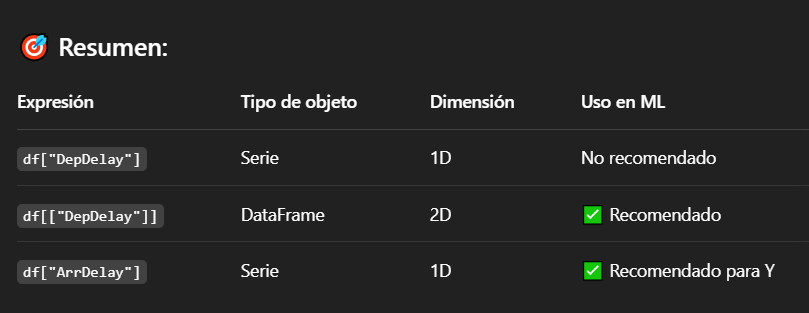

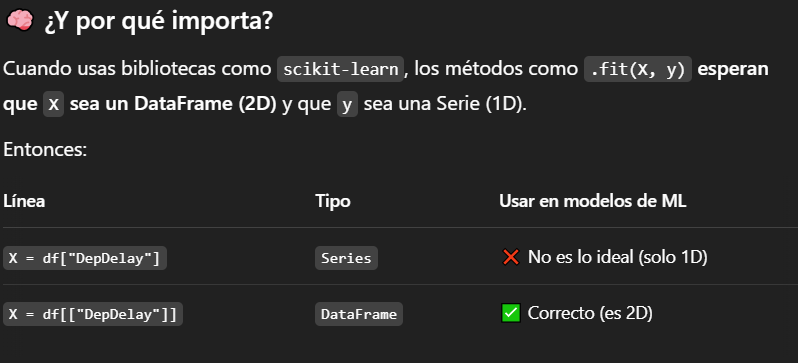


In [7]:
regr = linear_model.LinearRegression()

# 1. regr = linear_model.LinearRegression()
# Crea un modelo de regresión lineal vacío (sin entrenar)
# Este objeto tiene métodos para entrenar, predecir y analizar el modelo.


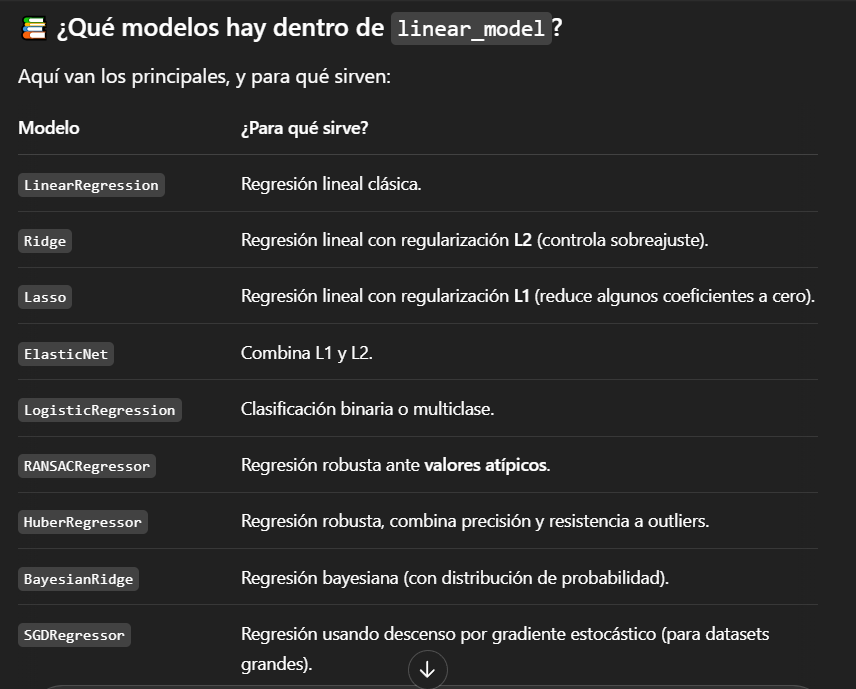

In [8]:
regr.fit(X,Y)
# Entrena el modelo usando:
# X: las variables independientes (por ejemplo, retraso en salida).
# Y: la variable dependiente (por ejemplo, retraso en llegada).


LinearRegression()

2. regr.fit(X, Y)

🔹 El modelo busca la mejor línea que relacione X con Y:

Y=mX+b
Después de esto, el modelo ya tiene calculados:

- coef_ (pendiente m)
- intercept_ (intercepto b)

In [9]:
print("Coeficientes: ", regr.coef_)
# Muestra los coeficientes (pendientes) del modelo.
# Si X tiene una sola columna, se verá algo como:
#Coeficientes:  [0.95]
#Eso significa que por cada unidad de X, Y aumenta aproximadamente 0.95 unidades.


Coeficientes:  [1.01769887]


In [10]:
Y_pred = regr.predict(X)
# Usa el modelo entrenado para predecir los valores de Y (retraso en llegada) a partir de X (retraso en salida).
print("R cuadrado", r2_score(Y, Y_pred))

R cuadrado 0.8720504680628491


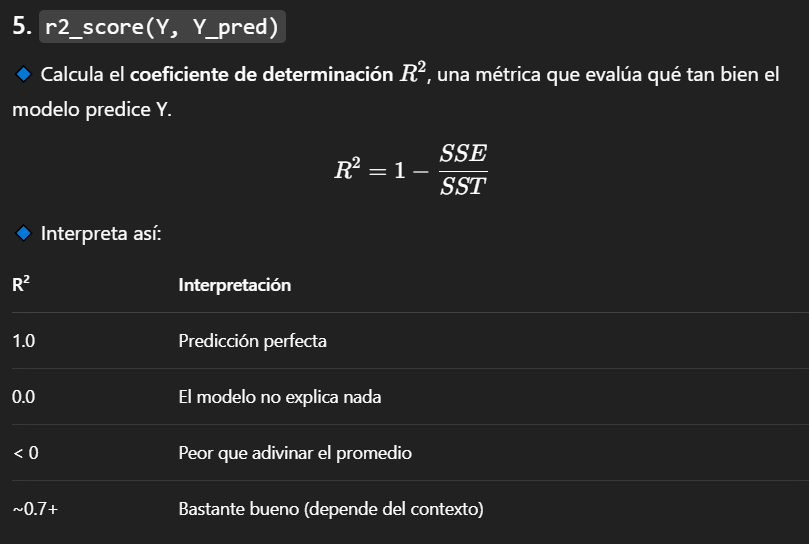

In [16]:
regr.coef_
r2_score(Y,Y_pred)

0.8720504680628491

### parametros para r2_score

✅ 1. Y (obligatorio)
- Valores reales (observados) de la variable dependiente (Y).
- Debe tener el mismo tamaño que y_pred.

✅ 2. y_pred (obligatorio)

- Valores predichos por el modelo.
- Deben estar alineados en orden con y_true.



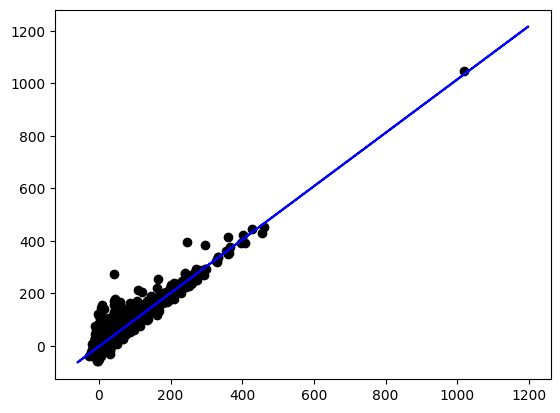

In [18]:
plt.scatter(x= X[1:10000], y= Y[1:10000],color= "black")
plt.plot(X[1:100000], Y_pred[1:100000], color = "Blue")
plt.show()

In [20]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [30]:
X = df[["AirTime", "Distance", 'TaxiIn', "TaxiOut"]]
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data=df[["Month", "DayofMonth", "DayOfWeek", "Origin", "Dest"]])
X = dummies.add(X, fill_value=0)
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=647)

In [32]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R cuadrado = ", r2_score(Y, Y_pred))


R cuadrado =  0.17535005412892402


In [33]:
X = X.add(df[["DepDelay"]], fill_value=0)

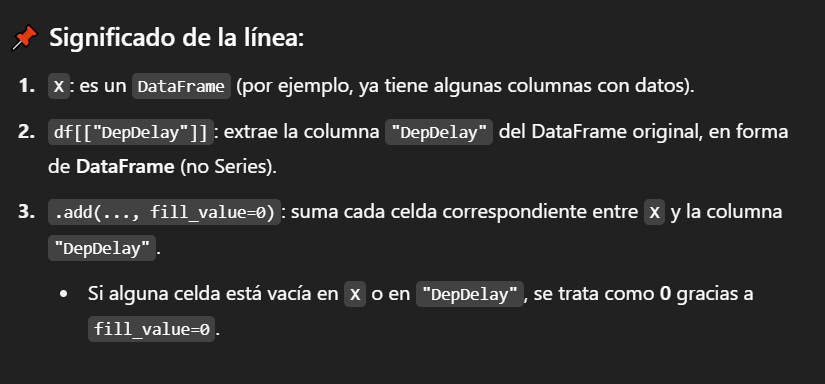

In [34]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R cuadrado =  ", r2_score(Y, Y_pred))

R cuadrado =   0.9718401761650258
